![example](aviation.jpg)

# Expansion into aviation

**Authors:** Wambui Kamotho
***

## Overview


This project analyzes an extensive list of aviation accidents which has over 80,000 entries recorded over more than a hundred years. More than three fourths of the accidents recorded occur on flights with personal or training purposes. However, when it comes to make and model, we cannot definitevely determine if one is more prone to accidents than others because we do not have information on flights that include those that were not in accidents. The company can use these analyses to determining which aircrafts are low risk.

![example](plane.jpg)

## Business Problem


The company would like to know which aircraft is the most low-risk, and therefor a good place to start in their venture into aviation. 
***

## Data Understanding

The data set being utilised in this for this analysis is a list of aviation accidents, this includes helicopter and other flying vessels. The location of the accident is recorded, details of the aircrafts such as make and model, as well as the number and severity of injuries. 

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
Aviation_accidents_df= pd.read_csv("AviationData.csv", encoding='latin-1', low_memory=False )
print(Aviation_accidents_df.shape)
Aviation_accidents_df.head()

(88889, 31)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#View column names and count of non-null entries.
Aviation_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Data Preparation

To prepare the data for analysis, we must get rid of non-null values. I also replaced the periods '.' with dashes '-' in the column names.

***
How the data was dealt with:
* Columns that were missing more than 10% of the data and are unimportant such as longitude and latitude
* For columns that have a few null values, the rows containing the nulls are dropped.
* With categorical data that is important and has many missing values, they are simply kept as their own category "missing".
***

In [4]:
def renaming(name):
    if "." in name:
        name= name.replace(".", "_")
        return name
    else: 
        return name
Aviation_accidents_df.rename(columns=renaming, inplace=True)

In [5]:
 Aviation_accidents_df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [6]:
Aviation_accidents_df.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines          6084
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
dtype: i

In [7]:
Aviation_accidents_df.dropna(subset=["Location", "Country", "Make", "Model", "Amateur_Built", "Injury_Severity"], inplace= True)
#This data set contains over 80,000 records. Because of this we can drop the less than 5% of records that are missing the
#above data

In [8]:
print(Aviation_accidents_df["Airport_Code"].isna().sum())
Aviation_accidents_df["Airport_Code"].value_counts().head()

37496


NONE    1482
PVT      485
APA      160
ORD      149
MRI      137
Name: Airport_Code, dtype: int64

In [9]:
#Airport code is not important to the analysis we would like to conduct, therefore we can drop the whole column.
Aviation_accidents_df.drop("Airport_Code" , axis=1, inplace=True)

In [10]:
print(Aviation_accidents_df["Airport_Name"].isna().sum())
Aviation_accidents_df["Airport_Name"].value_counts().head()

34991


Private             240
PRIVATE             224
Private Airstrip    153
NONE                146
PRIVATE STRIP       110
Name: Airport_Name, dtype: int64

In [11]:
#Airport name is not important to the analysis we would like to conduct, therefore we can drop the whole column.
Aviation_accidents_df.drop("Airport_Name" , axis=1, inplace=True)

In [12]:
print(Aviation_accidents_df["Aircraft_damage"].isna().sum())
Aviation_accidents_df["Aircraft_damage"].value_counts().head()

2639


Substantial    63763
Destroyed      18397
Minor           2536
Unknown           92
Name: Aircraft_damage, dtype: int64

In [13]:
Aviation_accidents_df["Aircraft_damage"].fillna("missing", inplace=True)

In [14]:
print(Aviation_accidents_df["Latitude"].isna().sum())
Aviation_accidents_df["Latitude"].value_counts().head()

53338


332739N      19
335219N      18
32.815556    17
334118N      17
324934N      16
Name: Latitude, dtype: int64

In [15]:
print(Aviation_accidents_df["Longitude"].isna().sum())
Aviation_accidents_df["Longitude"].value_counts().head()

53347


0112457W       24
1114342W       18
-104.673056    17
1151140W       17
-112.0825      16
Name: Longitude, dtype: int64

In [16]:
#Because we have other indicators of location we can drop longitude and latitude
Aviation_accidents_df.drop(["Latitude", "Longitude"], axis=1, inplace=True)

In [17]:
print(Aviation_accidents_df["Aircraft_Category"].isna().sum())
Aviation_accidents_df["Aircraft_Category"].value_counts().head()

56103


Airplane      26738
Helicopter     3361
Glider          508
Balloon         231
Gyrocraft       173
Name: Aircraft_Category, dtype: int64

In [18]:
#Aircraft category is quite important therefore we keep the column and use a placeholder for the missing values.
Aviation_accidents_df["Aircraft_Category"].fillna("missing", inplace=True)

In [19]:
print(Aviation_accidents_df["Registration_Number"].isna().sum())
Aviation_accidents_df["Registration_Number"].value_counts().head()

1178


NONE     337
UNREG    121
None      64
UNK       12
USAF       9
Name: Registration_Number, dtype: int64

In [20]:
#Get rid of duplicates
Aviation_accidents_df["Registration_Number"]= Aviation_accidents_df["Registration_Number"].replace("None", "NONE")

In [21]:
# For registration number we can use a placeholder because less than 10% of the data is missing.
Aviation_accidents_df["Registration_Number"].fillna("missing", inplace=True)

In [22]:
print(Aviation_accidents_df["Number_of_Engines"].isna().sum())
Aviation_accidents_df["Number_of_Engines"].value_counts().head()

5212


1.0    69332
2.0    10778
0.0     1220
3.0      475
4.0      406
Name: Number_of_Engines, dtype: int64

In [23]:
#Number of engines could be important data, therefore we randomly replace missing values with one of the options
Aviation_accidents_df["Number_of_Engines"].value_counts(normalize=True)

1.0    0.843301
2.0    0.131095
0.0    0.014839
3.0    0.005778
4.0    0.004938
8.0    0.000036
6.0    0.000012
Name: Number_of_Engines, dtype: float64

In [24]:
a= list(Aviation_accidents_df["Number_of_Engines"].value_counts(normalize=True).keys())
p= [i for i in Aviation_accidents_df["Number_of_Engines"].value_counts(normalize=True)]

In [25]:
def assign_num_of_engines(value):
    if value not in a:
        return np.random.choice(a,p=p)
    else:
        return value    

Aviation_accidents_df.Number_of_Engines=Aviation_accidents_df.Number_of_Engines.map(lambda x: assign_num_of_engines(x))
                    


In [26]:
print(Aviation_accidents_df["Engine_Type"].isna().sum())
Aviation_accidents_df["Engine_Type"].value_counts()

6136


Reciprocating      69336
Turbo Shaft         3512
Turbo Prop          3359
Turbo Fan           2341
Unknown             2013
Turbo Jet            696
None                  19
Electric               8
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Geared Turbofan        1
Name: Engine_Type, dtype: int64

In [27]:
# For Engine type we can use a placeholder because less than 10% of the data is missing.
Aviation_accidents_df["Engine_Type"].fillna("Unkwown", inplace=True)

In [28]:
print(Aviation_accidents_df["FAR_Description"].isna().sum())
Aviation_accidents_df["FAR_Description"].value_counts().head()

56309


091                          18193
Part 91: General Aviation     6448
NUSN                          1456
137                           1010
135                            738
Name: FAR_Description, dtype: int64

In [29]:
#FAR description does not make sense to us, so it is dropped
Aviation_accidents_df.drop("FAR_Description", axis=1, inplace= True)

In [30]:
print(Aviation_accidents_df["Schedule"].isna().sum())
Aviation_accidents_df["Schedule"].value_counts().head()

75464


NSCH    4314
UNK     4082
SCHD    3567
Name: Schedule, dtype: int64

In [31]:
# The schedule is unimportant to our analysis, so it is dropped
Aviation_accidents_df.drop("Schedule", axis=1, inplace= True)

In [32]:
print(Aviation_accidents_df["Purpose_of_flight"].isna().sum())
Aviation_accidents_df["Purpose_of_flight"].value_counts().head()

5132


Personal              49317
Instructional         10575
Unknown                6644
Aerial Application     4709
Business               3996
Name: Purpose_of_flight, dtype: int64

In [33]:
# For purpose of flight we can use a placeholder because less than 10% of the data is missing and it is important.
Aviation_accidents_df["Purpose_of_flight"].fillna("unkwown", inplace=True)

In [34]:
print(Aviation_accidents_df["Air_carrier"].isna().sum())
Aviation_accidents_df["Air_carrier"].value_counts()

71390


Pilot                                     258
United Airlines                            80
American Airlines                          76
Delta Air Lines                            45
SOUTHWEST AIRLINES CO                      41
                                         ... 
JSC Aspan                                   1
Sheldon Air Service                         1
Flightline, Inc                             1
RICHARD R. TAYLOR                           1
Baltimore Air Transport (dba: Corpjet)      1
Name: Air_carrier, Length: 13284, dtype: int64

In [35]:
# This data is unimportant to a company looking to enter the world of aviation, so it can be dropped
Aviation_accidents_df.drop("Air_carrier", axis=1, inplace= True)

In [36]:
print(Aviation_accidents_df["Total_Fatal_Injuries"].mean())
print(Aviation_accidents_df["Total_Fatal_Injuries"].median())
print(Aviation_accidents_df["Total_Fatal_Injuries"].mode())
Aviation_accidents_df["Total_Fatal_Injuries"].value_counts()#.head()

0.648171500630517
0.0
0    0.0
dtype: float64


0.0      58459
1.0       8828
2.0       5134
3.0       1568
4.0       1095
         ...  
124.0        1
162.0        1
169.0        1
150.0        1
156.0        1
Name: Total_Fatal_Injuries, Length: 123, dtype: int64

In [37]:
print(Aviation_accidents_df["Total_Serious_Injuries"].mean())
print(Aviation_accidents_df["Total_Serious_Injuries"].median())
print(Aviation_accidents_df["Total_Serious_Injuries"].mode())
Aviation_accidents_df["Total_Serious_Injuries"].value_counts().head()

0.282375514663753
0.0
0    0.0
dtype: float64


0.0    62034
1.0     9076
2.0     2804
3.0      625
4.0      255
Name: Total_Serious_Injuries, dtype: int64

In [38]:
print(Aviation_accidents_df["Total_Minor_Injuries"].mean())
print(Aviation_accidents_df["Total_Minor_Injuries"].median())
print(Aviation_accidents_df["Total_Minor_Injuries"].mode())
Aviation_accidents_df["Total_Minor_Injuries"].value_counts().head()

0.3609546476266032
0.0
0    0.0
dtype: float64


0.0    60209
1.0    10277
2.0     3557
3.0      778
4.0      365
Name: Total_Minor_Injuries, dtype: int64

In [39]:
print(Aviation_accidents_df["Total_Uninjured"].mean())
print(Aviation_accidents_df["Total_Uninjured"].median())
print(Aviation_accidents_df["Total_Uninjured"].mode())
Aviation_accidents_df["Total_Uninjured"].value_counts().head()

5.357867522728943
1.0
0    0.0
dtype: float64


0.0    28720
1.0    25042
2.0    15937
3.0     4295
4.0     2645
Name: Total_Uninjured, dtype: int64

In [40]:
#replacing the categories with the median
Aviation_accidents_df["Total_Fatal_Injuries"].fillna(Aviation_accidents_df["Total_Fatal_Injuries"].median(), inplace=True)
Aviation_accidents_df["Total_Serious_Injuries"].fillna(Aviation_accidents_df["Total_Serious_Injuries"].median(), inplace=True)
Aviation_accidents_df["Total_Minor_Injuries"].fillna(Aviation_accidents_df["Total_Minor_Injuries"].median(), inplace=True)
Aviation_accidents_df["Total_Uninjured"].fillna(Aviation_accidents_df["Total_Uninjured"].median(), inplace=True)

In [41]:
print(Aviation_accidents_df["Weather_Condition"].isna().sum())
Aviation_accidents_df["Weather_Condition"].value_counts()

3480


VMC    76948
IMC     5939
UNK      823
Unk      237
Name: Weather_Condition, dtype: int64

In [42]:
# For weather condition we can use a placeholder because less than 10% 
Aviation_accidents_df["Weather_Condition"].fillna("Unk", inplace= True)

In [43]:
#Removing duplicates
Aviation_accidents_df["Weather_Condition"]=Aviation_accidents_df["Weather_Condition"].replace("UKN", "Unk")

In [44]:
print(Aviation_accidents_df["Broad_phase_of_flight"].isna().sum())
Aviation_accidents_df["Broad_phase_of_flight"].value_counts()

25991


Landing        15382
Takeoff        12435
Cruise         10206
Maneuvering     8113
Approach        6517
Climb           2018
Taxi            1950
Descent         1874
Go-around       1351
Standing         934
Unknown          537
Other            119
Name: Broad_phase_of_flight, dtype: int64

In [45]:
#
Aviation_accidents_df["Broad_phase_of_flight"].fillna("Unknown", inplace= True)

In [46]:
print(Aviation_accidents_df["Report_Status"].isna().sum())
Aviation_accidents_df["Report_Status"].value_counts().head()

5442


Probable Cause                                                                  61466
Foreign                                                                          1864
<br /><br />                                                                      145
Factual                                                                           143
The pilot's failure to maintain directional control during the landing roll.       56
Name: Report_Status, dtype: int64

In [47]:
Aviation_accidents_df["Report_Status"].fillna("N/A", inplace= True)

In [48]:
print(Aviation_accidents_df["Publication_Date"].isna().sum())
Aviation_accidents_df["Publication_Date"].value_counts()

13415


25-09-2020    16591
26-09-2020     1620
03-11-2020      979
31-03-1993      450
25-11-2003      395
              ...  
16-10-2002        1
13-11-1996        1
10-11-2009        1
28-03-2001        1
14-03-2003        1
Name: Publication_Date, Length: 2877, dtype: int64

In [49]:
Aviation_accidents_df["Publication_Date"].fillna("01-01-0001", inplace= True)

In [50]:
Aviation_accidents_df.isna().sum().sum()

0

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [51]:
#I noticed that the capitalization of make and model names were not uniform- this is to make them all similar in capitalization
Aviation_accidents_df["Make"]= Aviation_accidents_df["Make"].apply(lambda x: x.title())
Aviation_accidents_df["Model"]= Aviation_accidents_df["Model"].apply(lambda x: x.title())
Aviation_accidents_df["Make"].map(lambda x: x.strip())
Aviation_accidents_df["Model"].map(lambda x: x.strip())
#This creates a new column 'Make_and_Model' in order to be able to look at both
Aviation_accidents_df["Make_and_Model"]= Aviation_accidents_df["Make"]+ Aviation_accidents_df["Model"]


In [52]:
#This data frame includes only the recorded accidents of airplanes with 2 engines(the standard number of engines for a commercial aircraft)
Commercial_df= Aviation_accidents_df[Aviation_accidents_df["Aircraft_Category"]=="Airplane"]
commercial_df=Commercial_df[Commercial_df["Number_of_Engines"]==2]
#Amateur built aircrafts are excluded because they are high risk based on the fact that their amateur built alone.
Commercial_df=Commercial_df[Commercial_df["Amateur_Built"]=="No"]
Commercial_df["Make_and_Model"].value_counts().tail(20)


Piper24-140                          1
Boeing777 24Q                        1
PiperAerostar 600                    1
RobertsonC-414                       1
Ware Jerry LAventura Ii              1
DehavillandDhc-2-L-20                1
WeinzierlSearey                      1
BoeingB-75                           1
MauleMt7                             1
Legacy2000                           1
GrummanTmb-3E                        1
PiperPa-32T                          1
North American Aviation Div.T-28C    1
AirbusA-320-200                      1
GlobeGc 1A                           1
Ayres CorporationS 2R                1
PiaggioP.180                         1
Aeronca Champ7Ec                     1
BristellE-Lsa                        1
North AmericanAt 6D                  1
Name: Make_and_Model, dtype: int64

Text(0.5, 1.0, 'Top 10 makes involved in the most accidents')

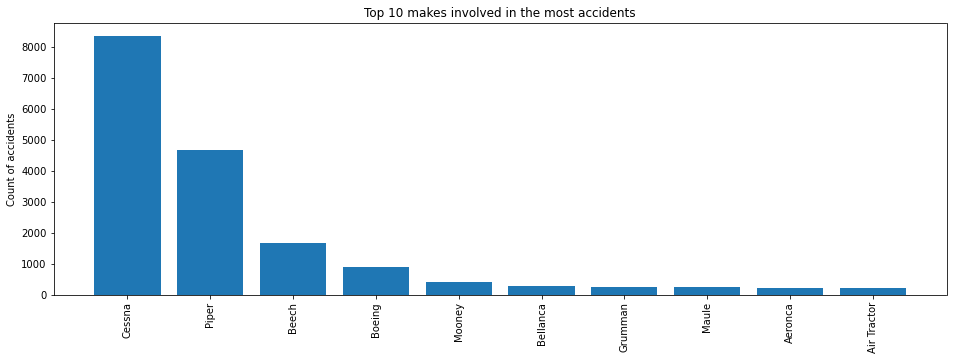

In [53]:
# Run the code to model the data
fig, ax= plt.subplots(figsize=(16, 5))

aircraft_makes = Commercial_df["Make"].value_counts().iloc[:10]

# Plot data
ax.bar(aircraft_makes.index, aircraft_makes.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=90)
ax.set_ylabel("Count of accidents")
ax.set_title("Top 10 makes involved in the most accidents")

<BarContainer object of 4 artists>

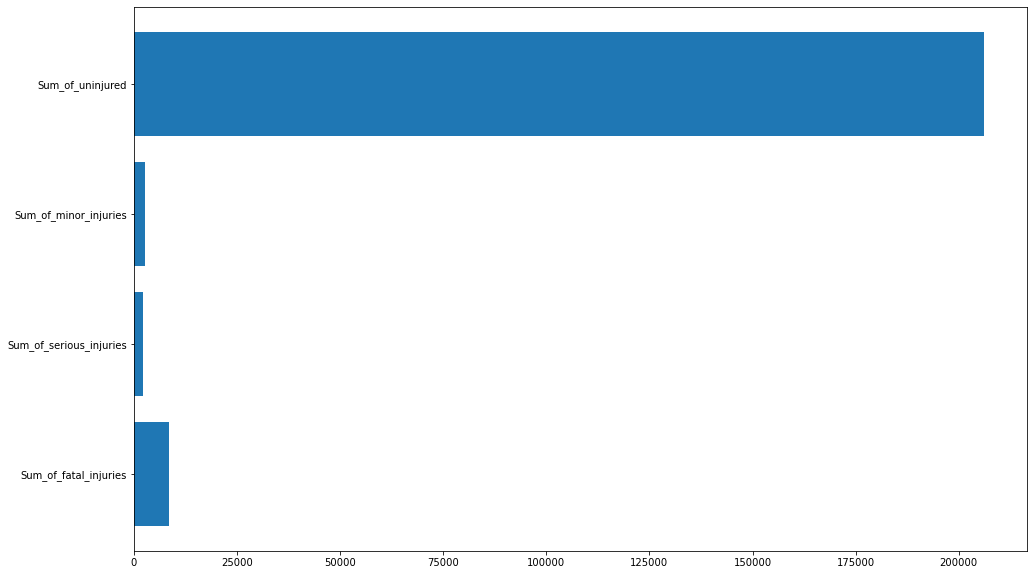

In [54]:
#Looking closer at one of the more popular makes which has a lower accident count
Boeing_df= Aviation_accidents_df[Aviation_accidents_df["Make"]=="Boeing"]
Injury_types=["Sum_of_fatal_injuries","Sum_of_serious_injuries","Sum_of_minor_injuries", "Sum_of_uninjured"]
Injury_numbers=[Boeing_df["Total_Fatal_Injuries"].sum(),Boeing_df["Total_Serious_Injuries"].sum(),
Boeing_df["Total_Minor_Injuries"].sum(),Boeing_df["Total_Uninjured"].sum()]
#Create a model
fig, ax= plt.subplots(figsize=(16, 10))

ax.barh(Injury_types, Injury_numbers)


Text(0.5, 1.0, 'Distribution of accidents by make')

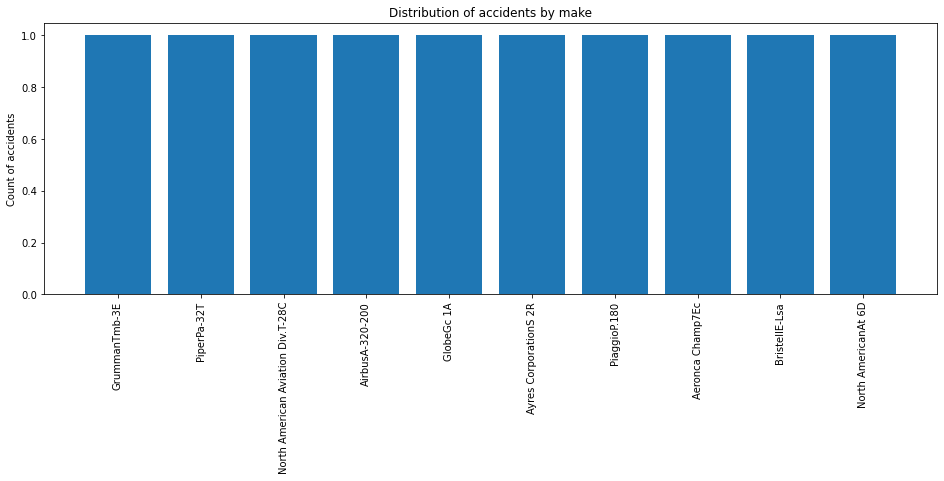

In [55]:
# Run the code to model the data
fig, ax= plt.subplots(figsize=(16, 5))

aircraft_makes = Commercial_df["Make_and_Model"].value_counts().iloc[-10:]

# Plot data
ax.bar(aircraft_makes.index, aircraft_makes.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=90)
ax.set_ylabel("Count of accidents")
ax.set_title("Distribution of accidents by make")

## Evaluation

The first graph displays the ten most common models in accidents. Because the company is looking for a low risk aircraft, I focus on the make with the 4th highest number of accidents because this make is likely a popular make without being extremely high risk.
The second graph shows that majority of individuals who have been in accidents while in a Boeing aircraft were uninjured, showing that the aircraft has low risk of horrible accidents. 
The third graph shows a few aircrafts that are acceptable for commercial ventures are in the least number of incidents. I chose to recommend one Boeing aircraft- for its previously shown low risk for injured individual and one other aircraft for the company





## Conclusions
In conclusion the data has highlighted a few aircraft makes as having very high incidents rates which the company should definitely avoid. 
I recommend the Boeing 75 and th eDouglas Md-80 for he company to begin their venture into aviation with.

In Future I would include counts of aircrafts with the same make in order to more definetively determine which aircrafts are in more accidents in proportion to their numbers.

